#**CHAP5.회귀**

##**1.회귀 소개**
  * 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
  * 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭함

  * 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

  * 회귀 유형 구분
    * 독립변수 개수 > 단일 회귀 / 다중 회귀
    * 회귀 계수의 결합 : 선형 회귀 / 비선형 회귀
  
  * 지도학습
    * 분류 : 예측값이 Categorical
    * 회귀 : 예측 값이 연속값

  * 선형 회귀 모형
    * 일반 선형 회귀 : 예측값과 실제 값의 RSS를 최소화 할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
    * 릿지 : 선형 회귀에 L2 규제를 추가한 회귀 모델. L2규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
    * 라쏘 : 선형 회귀에 L1 규제를 적용한 방식. L2 규제가 회귀 계수 값의 크기를 줄이는데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것
    * 엘라스틱넷 : L2,L1 규제를 함께 결합한 모델. 주로 피처가
    * 로지스틱 회귀 : 분류에 사용되는 선형 모델

##**2. 단순 선형 회귀를 통한 회귀 이해**

* 단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀

* 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류값
  * 최적의 회귀 모델 : 잔차의 합이 최소가 되는 모델

* RSS : 잔차 제곱 합
  * RSS를 최소로 하는 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항임.
  * 회귀에서 RSS는 비용이며 회귀 계수로 구성되는 RSS를 비용 함수라고 함.

##**3.비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

  * 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화 하는 방법을 직관적으로 제공
  * 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W파라미터를 구하는 방식
  * 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W파라미터를 지속해서 보정해 나감(W 파라미터를 업데이트)
  * 최초 W에서부터 미분을 적용한 뒤 미분 값이 계속 감소하는 방향으로 순차적으로 W를 업데이트 > 미분된 1차함수의 기울기가 감소하지 않는 지점을 비용함수가 최저인 지점으로 간주하고 그때의 w를 반환

  * 경사하강법의 일반적인 프로세스
    * STEP1 : w1,w2를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
    * STEP2 : 업데이트 된 w = 이전 w - 학습률*편미분값
    * SETP3 : 비용 함수의 값이 감소했으면 다시 STEP2 반복, 더 이상 비용 함수의 값이 감소하지 않으면 그때의 w1,w2를 구하고 반복을 중지


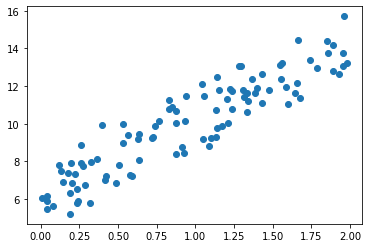

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4x+6 을 근사 (w1=4,w0=6). 임의의 값은 노이즈를 위해 만듦
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

#X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

* 비용 함수 정의

In [5]:

def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

* gradient_descent() : 경사 하강법 구현

In [6]:
#w1과 w0을 업데이트할 w1_update,w0_update를 반환

def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)
  #먼저 w1_updeat, w0_update를 각각 w1,w0의 shpae와 동일한 크기를 가진 0 값으로 초기화
  w1_update=np.zeros_like(w1)
  w2_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X,w1.T)+w0
  diff=y-y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors=np.ones((N,1))

  #w1과 w0을 업데이트할 w1_update 와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update,w0_update

In [7]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트

def gradient_descent_steps(X,y, iters=10000):
  #w0과 w1을 모두 0으로 초기화
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates()호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

* gradient_descent_steps()를 호출해 w1과 w0구하기

* 최종적으로 RSS를 계산하는 get_cost() 함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산

In [8]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost


w1,w0=gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))


w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


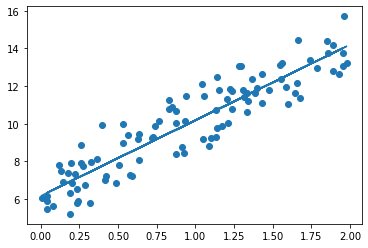

In [9]:
plt.scatter(X,y)
plt.plot(X,y_pred)

> 경사하강법을 통해 회귀선이 잘 만들어 짐

* 확률적 경사 하강법 : Stochastic Gradient Descent
  * 경사하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸림
  * 일부 데이터만 이용해 w가 업데이트 되는 값을 계산함

* stochastic_gradietn_descent_steps()
  * (미니배치)확률적 경사 하강법

In [10]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost=100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update,w0_update=get_weight_updates(w1,w0,sample_X,sample_y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

In [11]:
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:",round(w1[0,0],3), "w0:",round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


* 피처가 M개인 경우 회귀 계수 M+1개 > 선형대수로 계산

##**4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

###1) LinearRegression 클래스 - Ordinary Least Squares

* LinearRegression 클래스는 예측값과 실제 값의 RSS 를 최소화해 OLS 추정 방식으로 구현한 클래스

* fit() 메서드로 X,y 배열을 입력받으면 회귀 계수인 W를 coef_속성에 저장함

* 입력 파라미터 
  * fit_intercept : 불린 값, 디폴트 True. intercept 값을 계산할 것인지 아닌지를 지정
    * False 이면 절편 0
  * normalize : 회귀를 수행하기 전에 입력 데이터 세트를 정규화 할 것 인지

* 속성
  * coef_ : fit()메서드를 수행했을 때 회귀 계수가 배열 형태로 저장
  * intercept_ : intercept 값

* 다중공선성 문제
  * 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐
  * 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용


###2) 회귀 평가 지표

* MAE (Mean Absolute Error)
  * 실제 값과 예측 값의 차이를 절댓값으로 변환해 평균
  * metrics.mean_absolute_error
  * scoring 함수 적용 값 : neg_mean_absolute_error
* MSE(Mean Sqaured Error)
  * 실제 값과 예측 값의 차이를 제곱해 평균
  * metrics.mean_squared_error
  * scoring 함수 적용 값 : neg_mean_sqaured_error
* RMSE
  * MSE는 오류의 제곱을 구하므로 실제 오류 평균보다 더 커짐 > MSE에 루트
* R^2
  * 분산 기반으로 예측성능을 평가
  * 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하여 1에 가까울수록 예측 정확도가 높음
  * metrics.r2_score
  * scoring 함수 적용값 : r2_score

* Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하는데, MAE와 MSE는 클수록 좋지 않은 것이므로 neg를 붙여 음수값으로 만들어 줌 > 작은 오류값이 더 큰 숫자로 인식
  * 값이 커질수록 나쁜 모델임


###3) LinearRegression을 이용해 보스턴 주택 가격 회귀 구현


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline


In [15]:
#boston 데이터 세트 로드
boston=load_boston()

#boston 데이터 세트 DataFrame 변환
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함
bostonDF['PRICE']=boston.target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* regplot()
  * X,Y 축 값의 산점도와 함께 선형 회귀 직선을 그려줌

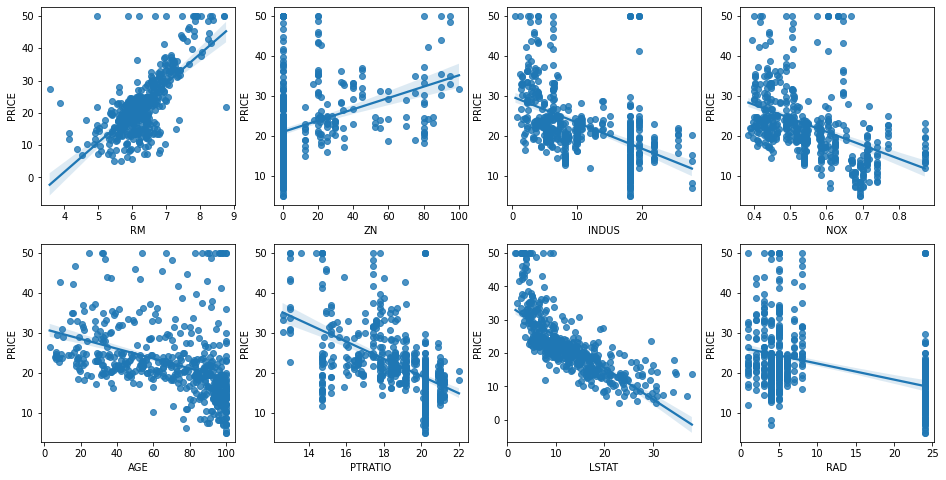

In [17]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs 는 4*2개의 ax를 가짐
fig, axs=plt.subplots(figsize=(16,8),ncols=4, nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row=int(i/4)
  col=i%4
  #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

* Linear Regression 클래스를 이용해 보스턴 주택 가격 회귀 모델 만들기

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print('MSE :{0:.3f}, RMSE :{1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE :17.297, RMSE :4.159
Variance score : 0.757


In [20]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_,1))

절편 값 :  40.995595172164755
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


* coef_ 를 피처별 회귀 계수 값으로 다시 매핑하고 높은 값 순으로 출력

In [22]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

* 5개의 폴드 세트에서 교차 검증으로 MSE와 RMSE를 측정
  * corss_val_score()는 RMSE를 제공하지 않으므로 MSE 수치 결과를 RMSE로 변환해야 함

In [24]:
from sklearn.model_selection import cross_val_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
lr=LinearRegression()

#corss_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores=cross_val_score(lr,X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

#corss_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores :',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


##**5. 다항 회귀와 과(대)적합/과소적합 이해**

* 다항 회귀 : 회귀가 독립 변순의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것

* 다항 회귀는 선형 회귀
  * 회귀에서 선형/비선형회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관함

* 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음
  * 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현함
  * PolynomialFeatures : degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환함
  

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2*2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

#degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

* 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수를 예측

In [ ]:
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 곘루 feature:\n',X)
y=polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

* 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현됨

In [ ]:
from sklearn.linear_model import LinearRegression
# 3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n',np.round(model.coef_,2))
print('Polynomial 회귀 Shape :',model.coef_.shape)

> 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어남

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model=Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model=model.fit(X,y)
print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))


###1) 다항 회귀를 이용한 괄소적합 및 과적합 이해

* 다항 회귀의 차수를 높이면 피처의 직선적 관계가 아닌 복잡한 다항 관계 모델링 가능
* 다항 회귀의 차수가 높아질수록 학습 데이터에만 너무 맞춘 학습이이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측정확도가 떨어짐



* 원래 데이터 세트는 피처 X와 target y가 노이즈가 포함된 다항식의 코사인 그래프 관계를 가지도록 만들어줌

* 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동값을 더한 값
y=true_fun(X)+np.random.randn(n_samples)*0.1



* 예측 결과를 비교할 다항식 차수를 각각 1,4,15로 변경하면서 예측 결과를 비교

In [ ]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

#다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax=plt.subplot(1,len(degrees),i+1)
  plt.setp(ax,xticks=(),yticks=())

  #개별 degree별로 Polynomial 변환
  polynomial_features=PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression=LinearRegression()
  pipeline=Pipeline([('polynomial_featrues',polynomial_features),
                     ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀를 평가
  scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
  #Pipeline을 구성하는 세부 객체를 접근하는 named_seps['객체명']을 이용해 회귀 계수 추출
  coefficients=pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i],np.round(coefficients,2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
  #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test=np.linspace(0,1,100)
  #예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
  plt.scatter(X,y,edgecolor='b',s=20,label="Samples")

  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc="best")
  plt.title("Degree {}\nMSE={:.2e}(+/- {:.2e})".format(degrees[i],-scores.mean(),scores.std()))

plt.show()



> 맨왼쪽의 Degree1 예측 곡선은 단순한 직선으로 단순 선형 회귀와 같음. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해 보임

> 두번째 Degree4 예측 곡선은 실제 데이터 세트와 유사한 모습

> 세번째 Degree15 예측 곡선은 MSE값이 매우 큼 (과적합)

###2) 편향-분산 트레이드 오프 (Bias-Variance Trade off)

* 고편향 : 매우 단순화된 모델로서 지나치게 한 반향성으로 치우침

* 고분산 : 매우 복잡한 모델로서 지나치게 높은 변동성을 가짐

* 저편향/저분산 : 예측 겨로가가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중됨

* 저편향/고분산 : 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포되어 있음

* 고편향/저분산 : 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중됨

* 고편향/고분산 : 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포됨

* 일반적으로 편향과 분산은 한 쪽이 높으면 한쪽이 낮아지는 경향

* 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 골디락스 지점 > 이후로 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능은 다시 저하됨

* 고편향/저분산에서 과소적합되기 쉬우며 저편향/고분산에서 과적합되기 쉬움

* 편향과 분산이 서로 트레이트오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법.